# Sources

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.1-using-word-embeddings.ipynb

In [6]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing


In [8]:
embedding_layer = Embedding(1000, 64)

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 7s 0us/step


In [123]:
y_train[0:100]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6653 - acc: 0.6303 - val_loss: 0.6097 - val_acc: 0.7026
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5343 - acc: 0.7525 - val_loss: 0.5216 - val_acc: 0.7342
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4590 - acc: 0.7873 - val_loss: 0.4979 - va

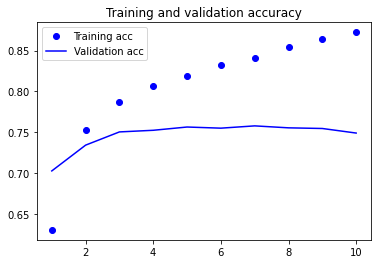

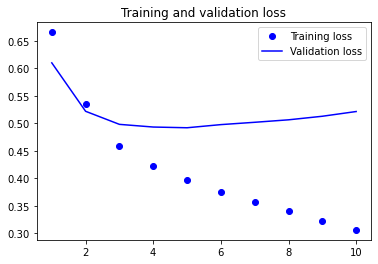

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
emb = model.layers[0].get_weights()[0]

In [18]:
import pandas as pd
pd.DataFrame(emb)

,0,1,2,3,4,5,6,7
0,-0.098051,0.025070,-0.070960,0.060892,0.068278,-0.051487,0.079851,-0.102403
1,-0.038832,0.043784,-0.003942,0.125374,-0.010694,-0.080973,0.017519,0.005960
2,-0.038283,-0.002643,0.009672,0.020773,-0.019436,-0.062316,0.066024,-0.002998
3,-0.020077,0.049735,-0.009009,-0.023914,-0.008192,0.028037,-0.037732,-0.013788
4,0.059609,-0.015479,0.035664,0.019680,0.035880,-0.059478,-0.078002,-0.083789
...,...,...,...,...,...,...,...,...
9995,-0.072925,0.016028,-0.001479,0.065966,-0.037391,-0.029450,-0.006687,-0.046987
9996,-0.039516,-0.025012,-0.036014,-0.012375,0.049474,0.004292,-0.039885,0.006047
9997,0.037191,0.018809,-0.041417,-0.031520,0.102071,-0.040630,-0.032852,0.048789
9998,-0.008384,0.035136,-0.018280,0.128729,-0.051277,-0.060695,0.049962,-0.104070


In [21]:
word_to_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [29]:
index_to_word = dict((v,k) for k,v in word_to_index.items())

In [35]:
d = {}
for case in x_test:
    for encoded_word in case:
        w = index_to_word[encoded_word+1]
        w_vector = emb[encoded_word]
        d[w] = w_vector
    

In [37]:
res = pd.DataFrame(d).T

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
z = pca.fit_transform(res.values)

In [56]:
res.loc['2003'], res.loc['1997']

(0   -0.038448
 1   -0.119288
 2    0.015597
 3   -0.009749
 4   -0.050145
 5   -0.009318
 6    0.028036
 7   -0.016967
 Name: 2003, dtype: float32,
 0    0.178868
 1   -0.045315
 2    0.158259
 3   -0.106459
 4    0.119768
 5    0.148116
 6   -0.115016
 7    0.167881
 Name: 1997, dtype: float32)

In [91]:
colors = []
for idx in res.index:
    if idx == '2003':
        colors.append('red')
    if idx == '1997':
        colors.append('red')
    else:
        colors.append('yellow')

In [92]:
'red' in colors

True

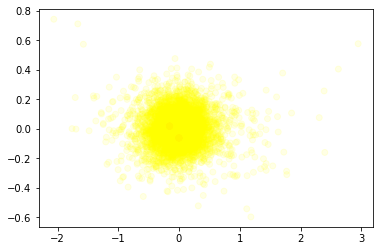

In [94]:

plt.scatter(z[:,0], z[:,1], c = colors[:-1], alpha = .1)

# Similarity Measure

If we want to capture the popularity, then we would choose the dot product as a similarity measure.

https://developers.google.com/machine-learning/clustering/similarity/measuring-similarity

In [95]:
from sklearn.metrics.pairwise import cosine_similarity



In [106]:
cosine_similarity(res.loc['2003'].values.reshape(1,-1), res.loc['1997'].values.reshape(1,-1))

array([[-0.21137209]], dtype=float32)

In [108]:
cosine_similarity(res.loc['movie'].values.reshape(1,-1), res.loc['1997'].values.reshape(1,-1))

array([[-0.58821833]], dtype=float32)

In [113]:
import requests

z = requests.get("https://archive.org/stream/FourVedasEnglishTranslation/Four-Vedas-English-Translation_djvu.txt")
z = z.text

AttributeError: 'str' object has no attribute 'body'